In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# --------------------------------
# 1. Load dataset
# --------------------------------
from sklearn.datasets import load_diabetes  # careful: sklearn has a DIFFERENT "diabetes" dataset
# Instead, load from Kaggle or CSV
# Assuming you downloaded from Kaggle:
df = pd.read_csv("diabetes.csv")

print("Shape:", df.shape)
print(df.head())

Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nStats:\n", df.describe())


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Duplicate rows: 0

Stats:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  8

In [5]:
zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[zero_invalid] = df[zero_invalid].replace(0, np.nan)

print("\nMissing after replacing zeros:\n", df.isnull().sum())


Missing after replacing zeros:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
imputer = SimpleImputer(strategy="median")  # median works well for skewed data
df[zero_invalid] = imputer.fit_transform(df[zero_invalid])


In [7]:
df = df.drop_duplicates()

In [8]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df = remove_outliers_iqr(df, df.columns[:-1])  # all features except "Outcome"

print("\nShape after removing outliers:", df.shape)



 (332, 9)er removing outliers:


In [11]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Standardization (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# OR Normalization (0-1 range)
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

In [27]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

X['BMI_Category'] = df['BMI'].apply(bmi_category)

# One-hot encode BMI_Category
X = pd.get_dummies(X, columns=['BMI_Category'], drop_first=True)



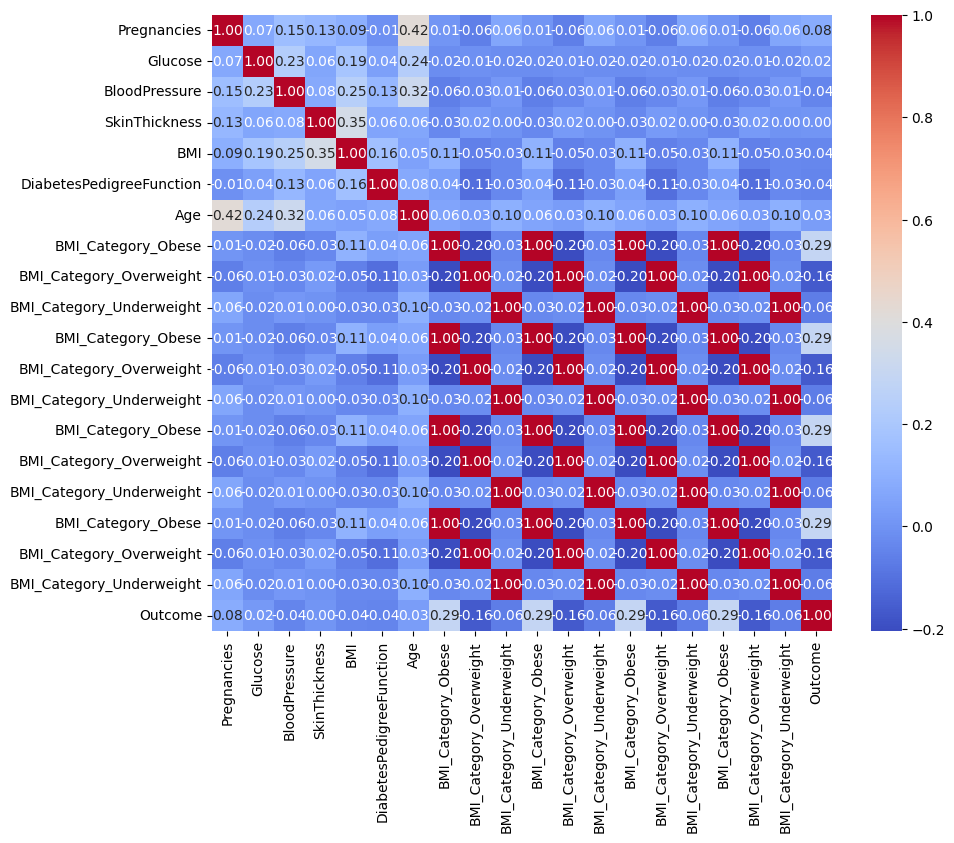

In [30]:
df_corr = pd.concat([X, y], axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [31]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (265, 19)
Test shape: (67, 19)
